In [3]:
import os
from operator import itemgetter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
get_ipython().magic(u'matplotlib inline')
plt.style.use('ggplot')

import tensorflow as tf

from keras import models, regularizers, layers, optimizers, losses, metrics
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

Both positive and negative feelings associated to movie reviews have labels in the IMDB dataset.

During the dataset preparation process, each review is transformed into a set of word embeddings, where each word is represented by a fixed-size vector.

1. Cutoff reviews after 150 words.
2. Restrict training samples to 100.
3. Validate on 10,000 samples.
4. Consider only the top 10,000 words.


In [4]:
from keras.layers import Embedding

# The number of possible tokens is 1000, which is the maximum word index plus one.
# and the embeddings' dimensions, in this case 64.
embedd_lay = Embedding(1000, 64)
from keras.datasets import imdb
from keras import preprocessing
from keras.utils import pad_sequences


**Custom-trained embedding layer with a training sample size of 100**



In [5]:
# Consider only the top 10,000 words
num_of_features = 10000

# Cutoff reviews after 150 words
max_sequence_length = 150

# Load the IMDB movie review dataset, considering the top num_of_features most frequent words
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_of_features)

# Take only the first 100 samples for training and testing
x_train = x_train[:100]
y_train = y_train[:100]

# Pad sequences to ensure uniform length
x_train = pad_sequences(x_train, maxlen=max_sequence_length )
x_test = pad_sequences(x_test, maxlen=max_sequence_length )

from keras.models import Sequential
from keras.layers import Flatten, Dense

model1 = Sequential()

# Add an Embedding layer with num_of_features input words, each mapped to an 8-dimensional vector
# After the Embedding layer, our activations have shape `(samples, maxlen, 8)`.
# Flatten the 3D tensor of embeddings into a 2D tensor
# resulting shape: (samples, maxlen * 8)
model1.add(Embedding(10000, 8, input_length=max_sequence_length))
model1.add(Flatten())

# Add a Dense layer with a single unit and sigmoid activation for binary classification
model1.add(Dense(1, activation='sigmoid'))
# Model compilattion
model1.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model1.summary()

history1 = model1.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

17464789/17464789 [==============================] - 2s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 150, 8)            80000     
                                                                 
 flatten (Flatten)           (None, 1200)              0         
                                                                 
 dense (Dense)               (None, 1)                 1201      
                                                                 
Total params: 81201 (317.19 KB)
Trainable params: 81201 (317.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
3/3 [==============================] - 3s 339ms/step - loss: 0.6959 - acc: 0.4625 - val_loss: 0.6865 - val_acc: 0.6500
Epoch 2/10
3/3 [==============================] - 1s 209ms/step - loss: 0.6717 - acc: 0

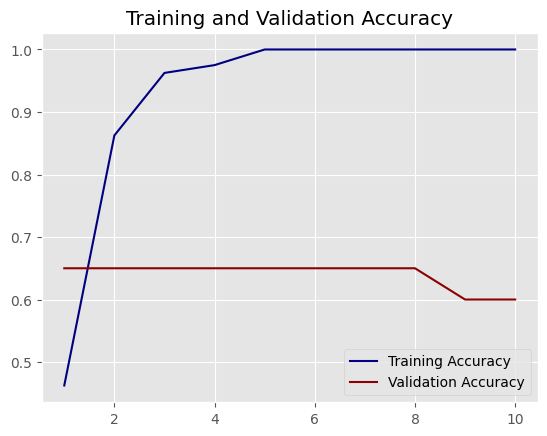

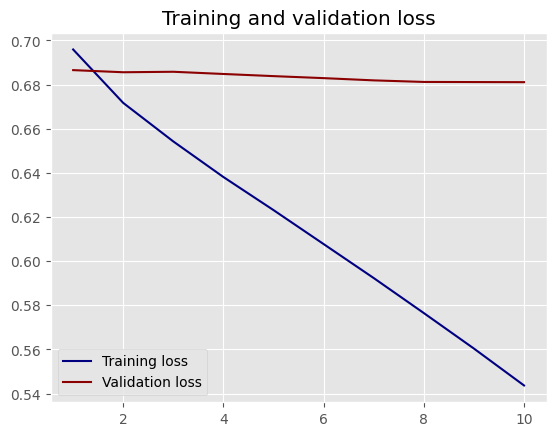

In [6]:
import matplotlib.pyplot as plt


training_accuracy = history1.history["acc"]

validation_accuracy = history1.history["val_acc"]

training_loss = history1.history["loss"]

validation_loss = history1.history["val_loss"]


epochs = range(1, len(training_accuracy) + 1)

plt.plot(epochs, training_accuracy, "navy", label = "Training Accuracy")
plt.plot(epochs, validation_accuracy,"darkred", label = "Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, training_loss, "navy", label = "Training loss")
plt.plot(epochs, validation_loss, "darkred", label = "Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()

In [7]:
test_loss, test_accuracy = model1.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

782/782 [==============================] - 3s 4ms/step - loss: 0.6943 - acc: 0.4934
Test loss: 0.6943113803863525
Test accuracy: 0.49344000220298767


**Custom-trained embedding layer with a training sample size of 5000**


In [8]:
num_of_features=10000

# Cut-Off reviews after 150 words
max_sequence_length=150

# Loading the IMDB Dataset
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_of_features)

x_train = pad_sequences(x_train, maxlen=max_sequence_length)
x_test = pad_sequences(x_test, maxlen=max_sequence_length)

texts = np.concatenate((x_train, x_test), axis=0)
labels = np.concatenate((x_train, x_test), axis=0)

x_train = x_train[:5000]
y_train = y_train[:5000]

model2 = Sequential()

model2.add(Embedding(10000, 8, input_length=max_sequence_length))

model2.add(Flatten())

model2.add(Dense(1, activation='sigmoid'))
model2.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model2.summary()

history2 = model2.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 150, 8)            80000     
                                                                 
 flatten_1 (Flatten)         (None, 1200)              0         
                                                                 
 dense_1 (Dense)             (None, 1)                 1201      
                                                                 
Total params: 81201 (317.19 KB)
Trainable params: 81201 (317.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
125/125 [==============================] - 11s 81ms/step - loss: 0.6918 - acc: 0.5305 - val_loss: 0.6905 - val_acc: 0.5200
Epoch 2/10
125/125 [==============================] - 6s 50ms/step - loss: 0.6664 - acc: 0.7063 - val_loss: 0.6724 - val_acc: 0.6400
Epoch 3/10
12

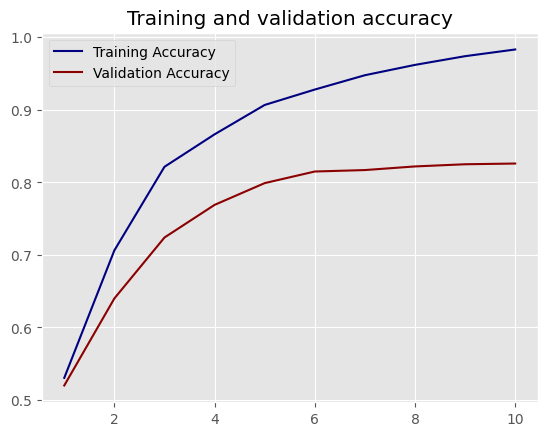

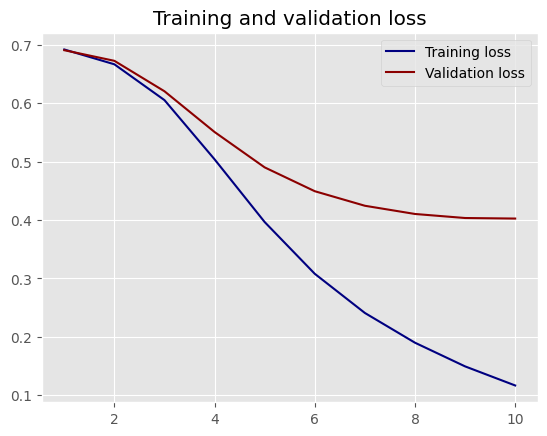

In [9]:
training_accuracy = history2.history['acc']
valid_accuracy = history2.history['val_acc']
training_loss = history2.history['loss']
valid_loss = history2.history['val_loss']

epochs = range(1, len(training_accuracy) + 1)

plt.plot(epochs, training_accuracy, 'navy', label='Training Accuracy')
plt.plot(epochs, valid_accuracy, 'darkred', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, training_loss, 'navy', label='Training loss')
plt.plot(epochs, valid_loss, 'darkred', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [10]:
test_loss, test_accuracy = model2.evaluate(x_test, y_test)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

782/782 [==============================] - 2s 2ms/step - loss: 0.3761 - acc: 0.8298
Test Loss: 0.37609368562698364
Test Accuracy: 0.829800009727478


 **Custom-trained embedding layer with a training sample size of 1000**

In [11]:
num_of_features=10000
max_sequence_length=150
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_of_features)

x_train = pad_sequences(x_train, maxlen=max_sequence_length)
x_test = pad_sequences(x_test, maxlen=max_sequence_length)

texts = np.concatenate((x_train, x_test), axis=0)
labels = np.concatenate((x_train, x_test), axis=0)

x_train = x_train[:1000]
y_train = y_train[:1000]

model3 = Sequential()

model3.add(Embedding(10000, 8, input_length=max_sequence_length))

model3.add(Flatten())

model3.add(Dense(1, activation='sigmoid'))
model3.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model3.summary()

history3 = model3.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 150, 8)            80000     
                                                                 
 flatten_2 (Flatten)         (None, 1200)              0         
                                                                 
 dense_2 (Dense)             (None, 1)                 1201      
                                                                 
Total params: 81201 (317.19 KB)
Trainable params: 81201 (317.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
25/25 [==============================] - 2s 74ms/step - loss: 0.6935 - acc: 0.4875 - val_loss: 0.6910 - val_acc: 0.5550
Epoch 2/10
25/25 [==============================] - 2s 62ms/step - loss: 0.6767 - acc: 0.7750 - val_loss: 0.6896 - val_acc: 0.5600
Epoch 3/10
25/25 [

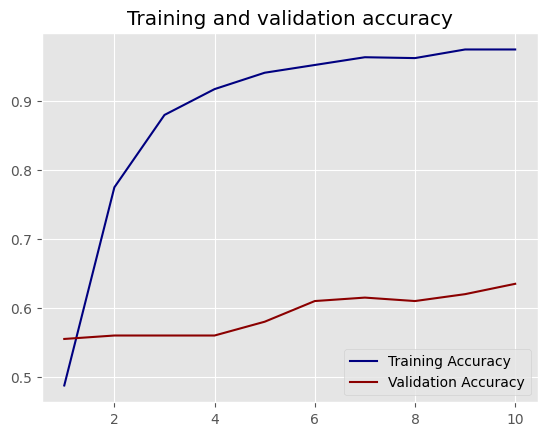

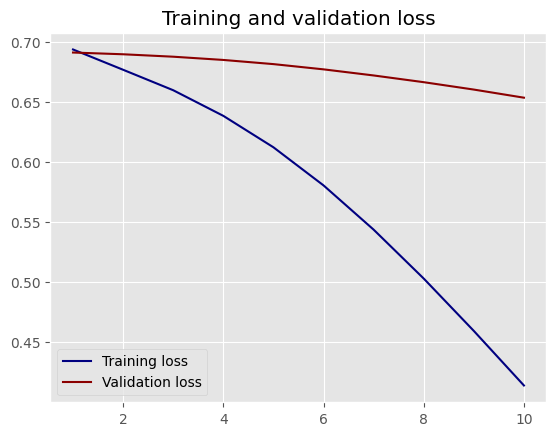

In [12]:
training_accuracy = history3.history["acc"]
valid_accuracy = history3.history["val_acc"]
training_loss = history3.history["loss"]
valid_loss = history3.history["val_loss"]

epochs = range(1, len(training_accuracy) + 1)

plt.plot(epochs, training_accuracy, "navy", label = "Training Accuracy")
plt.plot(epochs, valid_accuracy, "darkred", label = "Validation Accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, training_loss, "navy", label = "Training loss")
plt.plot(epochs, valid_loss, "darkred", label = "Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()

In [13]:
test_loss, test_accuracy = model3.evaluate(x_test, y_test)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

782/782 [==============================] - 2s 2ms/step - loss: 0.6689 - acc: 0.5993
Test Loss: 0.6688856482505798
Test Accuracy: 0.5992799997329712


**Custom-trained embedding layer with a training sample size of 10000**

In [14]:
num_of_features=10000
max_sequence_length=150

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_of_features)

x_train = pad_sequences(x_train, maxlen=max_sequence_length)
x_test = pad_sequences(x_test, maxlen=max_sequence_length)

texts = np.concatenate((x_train, x_test), axis=0)
labels = np.concatenate((x_train, x_test), axis=0)

x_train = x_train[:10000]
y_train = y_train[:10000]

model4 = Sequential()

model4.add(Embedding(10000, 8, input_length=max_sequence_length))

model4.add(Flatten())

model4.add(Dense(1, activation='sigmoid'))
model4.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model4.summary()

history4 = model4.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 150, 8)            80000     
                                                                 
 flatten_3 (Flatten)         (None, 1200)              0         
                                                                 
 dense_3 (Dense)             (None, 1)                 1201      
                                                                 
Total params: 81201 (317.19 KB)
Trainable params: 81201 (317.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
250/250 [==============================] - 15s 57ms/step - loss: 0.6876 - acc: 0.5670 - val_loss: 0.6707 - val_acc: 0.6740
Epoch 2/10
250/250 [==============================] - 7s 27ms/step - loss: 0.5909 - acc: 0.7890 - val_loss: 0.5225 - val_acc: 0.7975
Epoch 3/10
25

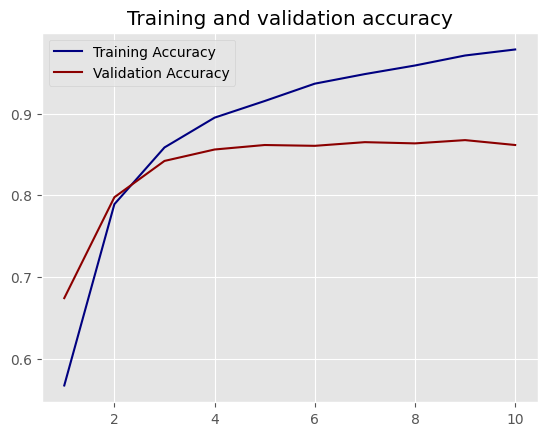

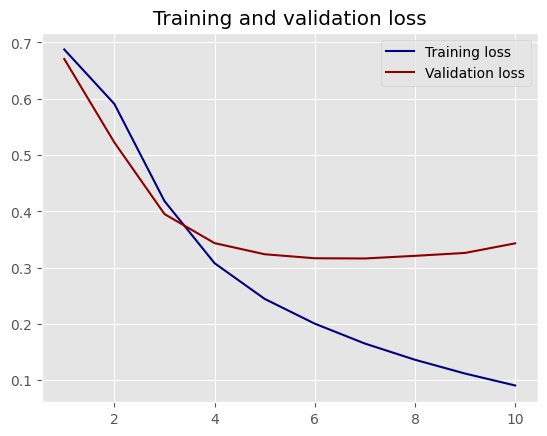

In [15]:
training_accuracy = history4.history["acc"]
valid_accuracy = history4.history["val_acc"]

training_loss = history4.history["loss"]
valid_loss = history4.history["val_loss"]

epochs = range(1, len(training_accuracy) + 1)

plt.plot(epochs, training_accuracy, "navy", label = "Training Accuracy")
plt.plot(epochs, valid_accuracy, "darkred", label = "Validation Accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, training_loss, "navy", label = "Training loss")
plt.plot(epochs, valid_loss, "darkred", label = "Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()

In [16]:
test_loss, test_accuracy = model4.evaluate(x_test, y_test)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

782/782 [==============================] - 2s 2ms/step - loss: 0.3408 - acc: 0.8546
Test Loss: 0.34075143933296204
Test Accuracy: 0.8546000123023987


**PRE-TRAINED WORD EMBEDDING LAYER:**


In [17]:
!curl -O https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
!tar -xf aclImdb_v1.tar.gz
!rm -r aclImdb/train/unsup

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 80.2M  100 80.2M    0     0  4844k      0  0:00:16  0:00:16 --:--:-- 9496k


In [18]:
import os
import shutil

imdb = 'aclImdb'
training = os.path.join(imdb, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(training, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding='utf-8')
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

When there is not enough training data to obtain word embeddings for the desired solution, it is recommended to use pre-trained word embeddings.






Tokenizing the data

In [19]:
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
import numpy as np

length2 = 150 # cut off review after 150 words
training_data = 100 # Training sample 100
validation_data = 10000 # Validation sample 10000
words = 10000 # Considers only the top 10000 words in the dataset

tokenizer1 = Tokenizer(num_words=words)
tokenizer1.fit_on_texts(texts)
sequences = tokenizer1.texts_to_sequences(texts)
word_index = tokenizer1.word_index
print("Found %s unique tokens." % len(word_index))

data = pad_sequences(sequences, maxlen=length2)

labels = np.asarray(labels)
print("Shape of data tensor:", data.shape)
print("Shape of label tensor:", labels.shape)
# Splits data into training and validation set, but shuffles is, since samples are ordered:
# all negatives first, then all positive
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_data] # (200, 100)
y_train = labels[:training_data] # shape (200,)
x_validation = data[training_data:training_data+validation_data] # shape (10000, 100)
y_validation = labels[training_data:training_data+validation_data] # shape (10000,)

Found 88582 unique tokens.
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)


Installing and setting up the GloVe word embedding

In [20]:
import numpy as np
import requests
from io import BytesIO
import zipfile

glove_url = 'https://nlp.stanford.edu/data/glove.6B.zip'  # URL to download GloVe embeddings
glove_zip = requests.get(glove_url)

# Unzip the contents
with zipfile.ZipFile(BytesIO(glove_zip.content)) as z:
    z.extractall('/content/glove')

# Loading GloVe embeddings into memory
embeddings_index = {}
with open('/content/glove/glove.6B.100d.txt', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

print("Found %s word vectors." % len(embeddings_index))


Found 400000 word vectors.


Using Gigaword 5 and Wikipedia data, we trained the 6B version of the GloVe model, which comprises 400,000 words and 6 billion tokens.


Preparing the GloVe word embeddings matrix


**A pre-trained word embedding layer with a training sample size of 100**

In [21]:
emb_dim = 100

embedding_matrix = np.zeros((words, emb_dim ))
for word, index in word_index.items():
    embedd_vector = embeddings_index.get(word)
    if index < words:
        if embedd_vector is not None:
            embedding_matrix[index] = embedd_vector # Words not found in embedding index will be all-zeros.

In [22]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(words, emb_dim , input_length=length2))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 150, 100)          1000000   
                                                                 
 flatten_4 (Flatten)         (None, 15000)             0         
                                                                 
 dense_4 (Dense)             (None, 32)                480032    
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1480065 (5.65 MB)
Trainable params: 1480065 (5.65 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In the Embeddig layer, pretrained word embedding is loaded. To guarantee that the Embedding layer cannot be trained, set this to False before executing it. Setting trainable = True will allow the optimization procedure to modify the word embedding settings. In order to keep students from forgetting what they already "know," it is essential to avoid updating pretrained parts while they are still receiving instruction.

In [24]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_validation, y_validation))
model.save_weights('pre_trained_glove_model.h5')

Epoch 1/10
4/4 [==============================] - 2s 266ms/step - loss: 5.0355 - acc: 0.4800 - val_loss: 1.1716 - val_acc: 0.5052
Epoch 2/10
4/4 [==============================] - 1s 219ms/step - loss: 0.5872 - acc: 0.7600 - val_loss: 1.0788 - val_acc: 0.4965
Epoch 3/10
4/4 [==============================] - 1s 219ms/step - loss: 0.4557 - acc: 0.7300 - val_loss: 0.8747 - val_acc: 0.5063
Epoch 4/10
4/4 [==============================] - 1s 193ms/step - loss: 0.1961 - acc: 0.9300 - val_loss: 0.8075 - val_acc: 0.5135
Epoch 5/10
4/4 [==============================] - 1s 218ms/step - loss: 0.1235 - acc: 0.9800 - val_loss: 0.7465 - val_acc: 0.5381
Epoch 6/10
4/4 [==============================] - 1s 192ms/step - loss: 0.0636 - acc: 1.0000 - val_loss: 1.3959 - val_acc: 0.4951
Epoch 7/10
4/4 [==============================] - 1s 196ms/step - loss: 0.0644 - acc: 1.0000 - val_loss: 0.7266 - val_acc: 0.5558
Epoch 8/10
4/4 [==============================] - 1s 218ms/step - loss: 0.0361 - acc: 1.00

Given the limited amount of training data, this rapid overfitting of the model is to be expected. The wide variance in validation accuracy can be explained by the same mechanism.

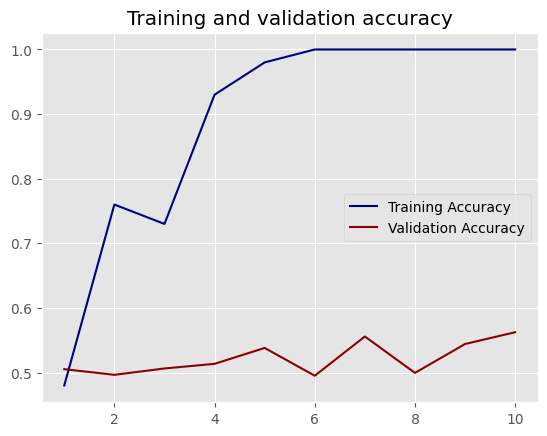

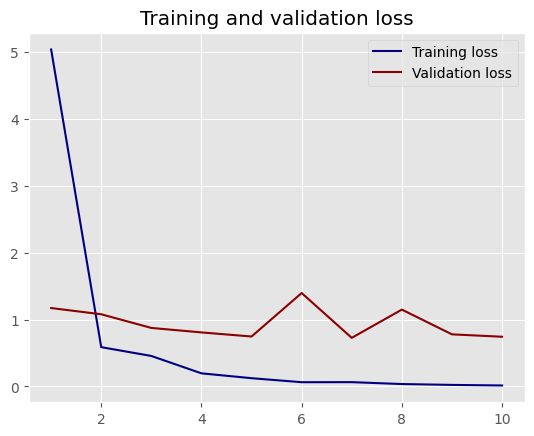

In [25]:
import matplotlib.pyplot as plt

training_accuracy = history.history['acc']
valid_accuracy = history.history['val_acc']

training_loss = history.history['loss']
valid_loss = history.history['val_loss']

epochs = range(1, len(training_accuracy) + 1)

plt.plot(epochs, training_accuracy, 'navy', label='Training Accuracy')
plt.plot(epochs, valid_accuracy, 'darkred', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, training_loss, 'navy', label='Training loss')
plt.plot(epochs, valid_loss, 'darkred', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [26]:
test_loss, test_accuracy= model.evaluate(x_test, y_test)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

782/782 [==============================] - 3s 4ms/step - loss: 0.8057 - acc: 0.4958
Test Loss: 0.8056982159614563
Test Accuracy: 0.49584001302719116


**A pre-trained word embedding layer with a training sample size of 5000**

In [27]:
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
import numpy as np

max_sequence_length = 150
training_data = 5000 # Training sample is 5000
validation_data = 10000
words = 10000

tokenizer = Tokenizer(num_words=words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index
print("Found %s unique tokens." % len(word_index))

data = pad_sequences(sequences, maxlen=max_sequence_length)

labels = np.asarray(labels)
print("Shape of data tensor:", data.shape)
print("Shape of label tensor:", labels.shape)

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_data]
y_train = labels[:training_data]
x_validation = data[training_data:training_data+validation_data]
y_validation = labels[training_data:training_data+validation_data]
embedd_di = 100

embedd_matrix = np.zeros((words, embedd_di))
for word, index in word_index.items():
    embedd_vector = embeddings_index.get(word)
    if index < words:
        if embedd_vector is not None:

            embedd_matrix[index] = embedd_vector

from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(words, embedd_di, input_length=max_sequence_length))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_validation, y_validation))
model.save_weights('pre_trained_glove_model.h5')


Found 88582 unique tokens.
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 150, 100)          1000000   
                                                                 
 flatten_5 (Flatten)         (None, 15000)             0         
                                                                 
 dense_6 (Dense)             (None, 32)                480032    
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1480065 (5.65 MB)
Trainable params: 1480065 (5.65 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
157/157 [==============================] - 

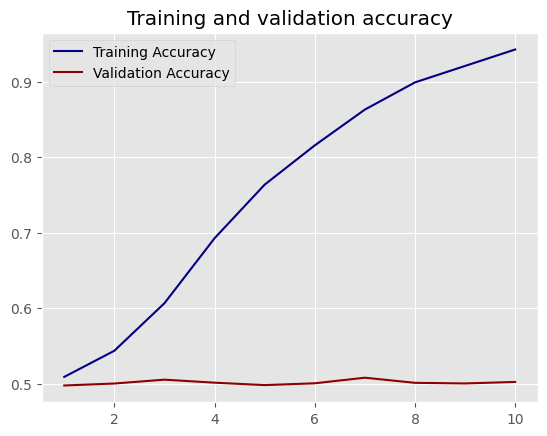

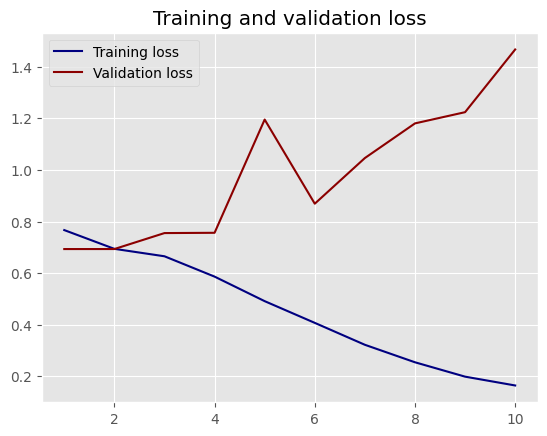

In [28]:
import matplotlib.pyplot as plt

training_accuracy = history.history['acc']
valid_accuracy = history.history['val_acc']
train_loss = history.history['loss']
valid_loss = history.history['val_loss']

epochs = range(1, len(training_accuracy) + 1)

plt.plot(epochs, training_accuracy, 'navy', label='Training Accuracy')
plt.plot(epochs, valid_accuracy, 'darkred', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, train_loss, 'navy', label='Training loss')
plt.plot(epochs, valid_loss, 'darkred', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [29]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

782/782 [==============================] - 3s 4ms/step - loss: 1.4322 - acc: 0.5051
Test Loss: 1.4322470426559448
Test Accuracy: 0.505079984664917


**A pre-trained word embedding layer with a training sample size of 1000**

In [30]:
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
import numpy as np

max_sequence_length = 150
training_data = 1000 #Trains on 1000 samples
validation_data = 10000
words = 10000

tokenizer = Tokenizer(num_words=words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index
print("Found %s Unique Tokens." % len(word_index))

data = pad_sequences(sequences, maxlen=max_sequence_length)

labels = np.asarray(labels)
print("Shape Of Data Tensor:", data.shape)
print("Shape Of Data Tensor:", labels.shape)

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_data]
y_train = labels[:training_data]
x_val = data[training_data:training_data+validation_data]
y_val = labels[training_data:training_data+validation_data]
embedding_dim = 100

embedd_matrix = np.zeros((words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < words:
        if embedding_vector is not None:

            embedd_matrix[i] = embedding_vector

from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(words, embedding_dim, input_length=max_sequence_length))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model.h5')


Found 88582 Unique Tokens.
Shape Of Data Tensor: (25000, 150)
Shape Of Data Tensor: (25000,)
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 150, 100)          1000000   
                                                                 
 flatten_6 (Flatten)         (None, 15000)             0         
                                                                 
 dense_8 (Dense)             (None, 32)                480032    
                                                                 
 dense_9 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1480065 (5.65 MB)
Trainable params: 1480065 (5.65 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
32/32 [==============================] - 3s 

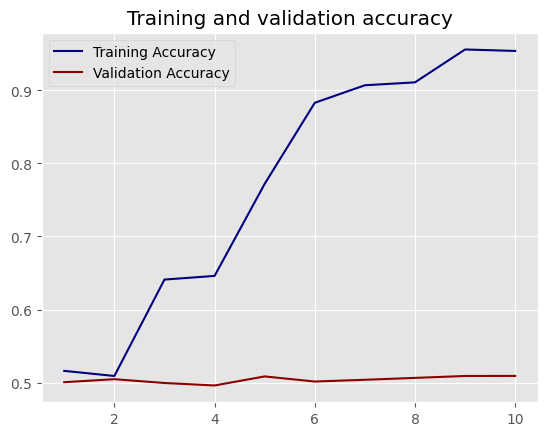

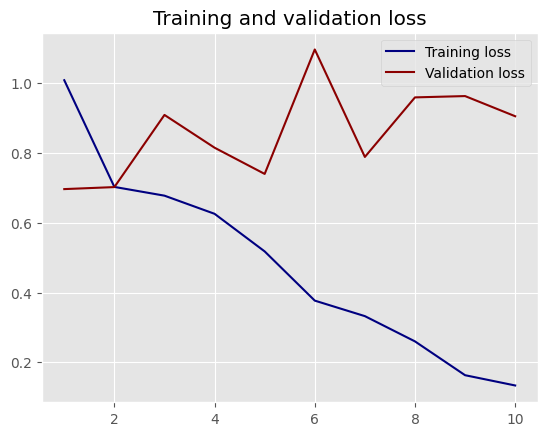

In [31]:
import matplotlib.pyplot as plt

training_accuracy = history.history['acc']
validation_accuracy = history.history['val_acc']

training_loss = history.history['loss']
validation_loss = history.history['val_loss']

epochs = range(1, len(training_accuracy) + 1)

plt.plot(epochs, training_accuracy, 'navy', label='Training Accuracy')
plt.plot(epochs, validation_accuracy, 'darkred', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, training_loss, 'navy', label='Training loss')
plt.plot(epochs, validation_loss, 'darkred', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [32]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

782/782 [==============================] - 3s 4ms/step - loss: 0.9073 - acc: 0.4916
Test Loss: 0.9073182940483093
Test Accuracy: 0.4915600121021271


**Pre-trained word embedding layer with a training sample size of 10000**

In [33]:
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
import numpy as np

max_sequence_length = 150
training_ds = 10000 # Trains on 10000 samples
validation_ds = 10000
words = 10000

tokenizer = Tokenizer(num_words=words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index
print("Found %s unique tokens." % len(word_index))

data = pad_sequences(sequences, maxlen=max_sequence_length)

labels = np.asarray(labels)
print("Shape Of Data Tensor:", data.shape)
print("Shape Of Label Tensor:", labels.shape)

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_ds]
y_train = labels[:training_ds]
x_val = data[training_ds:training_ds+validation_ds]
y_val = labels[training_ds:training_ds+validation_ds]
embedd_dim = 100

embedd_matrix = np.zeros((words, embedd_dim))
for word, i in word_index.items():
    embedd_vector = embeddings_index.get(word)
    if i < words:
        if embedd_vector is not None:

            embedd_matrix[i] = embedd_vector

from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(words, embedding_dim, input_length=max_sequence_length))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model.h5')


Found 88582 unique tokens.
Shape Of Data Tensor: (25000, 150)
Shape Of Label Tensor: (25000,)
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 150, 100)          1000000   
                                                                 
 flatten_7 (Flatten)         (None, 15000)             0         
                                                                 
 dense_10 (Dense)            (None, 32)                480032    
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1480065 (5.65 MB)
Trainable params: 1480065 (5.65 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
313/313 [==============================] - 

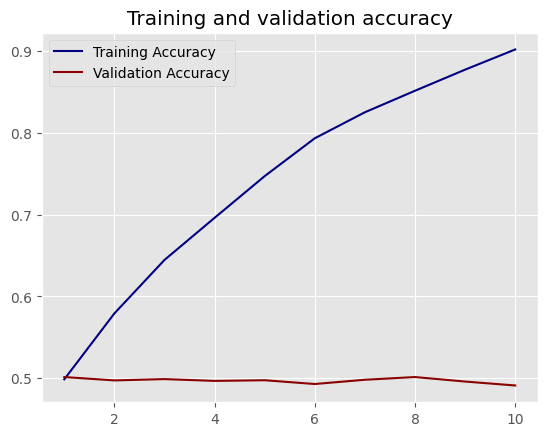

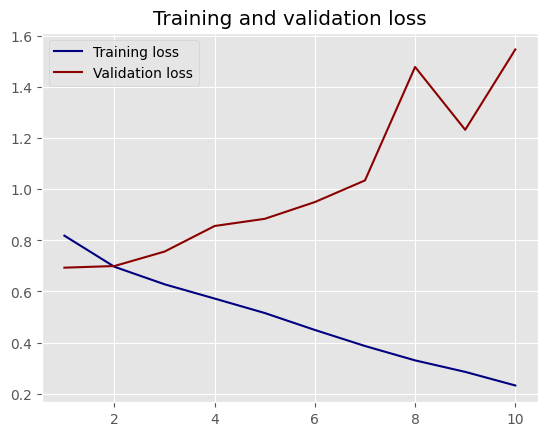

In [34]:
import matplotlib.pyplot as plt

training_accuracy = history.history['acc']
validation_accuracy = history.history['val_acc']

training_loss = history.history['loss']
validation_loss = history.history['val_loss']

epochs = range(1, len(training_accuracy) + 1)

plt.plot(epochs, training_accuracy, 'navy', label='Training Accuracy')
plt.plot(epochs, validation_accuracy, 'darkred', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, training_loss, 'navy', label='Training loss')
plt.plot(epochs, validation_loss, 'darkred', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [35]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

782/782 [==============================] - 2s 2ms/step - loss: 1.5148 - acc: 0.5006
Test Loss: 1.5148006677627563
Test Accuracy: 0.5006399750709534
